In [24]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, lognorm, kstest,pareto,powerlaw,norm,skewnorm

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SAHA PROJECT - connectedpapers zip files/one_dataset_complete2_norm_3wts.csv')
df.columns

Index(['Unnamed: 0', 'title', 'authors', 'n_citation', 'doi', 'url', 'pdf',
       'conf', 'fos', 'year', 'pool', 'topic', 'labels', 'bib name', 'dIDs',
       'ddIDs', 'kc len', 'ref int', 'semantic score', 'base heats',
       'der heats', 'ref int d_dd', 'sim L1', 'sim L2', 'derofder heats'],
      dtype='object')

In [4]:
year = list(df['year'])
cit = list(df['n_citation'])
ss = list(df['semantic score'])

## SIS vs Year

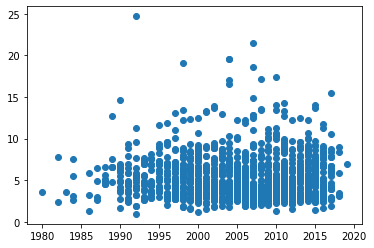

In [6]:
x = year
y = ss

plt.scatter(x, y)
plt.show()

## SIS vs Raw citation regression

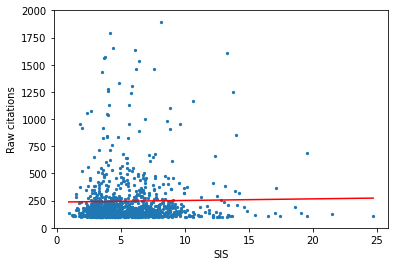

In [27]:
y = cit
x = ss

m, b = np. polyfit(x, y, 1)
y_line = [m*v+b for v in x]
pts = list(zip(x,y_line))
pts = sorted(pts,key=lambda x: x[0])
px = [v[0] for v in pts]
py = [v[1] for v in pts]
plt.plot(px, py,'red')
# set_ylim((0,2000))
plt.scatter(x, y,s=5)
plt.ylim(0,2000)
plt.xlabel('SIS')
plt.ylabel('Raw citations')
# plt.title('Raw citation vs SIS')
plt.show()

## SIS distribution

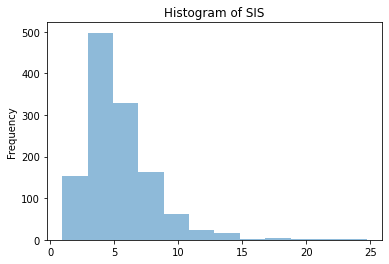

In [19]:
ax = df['semantic score'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram of SIS')
plt.show()

## Raw citation distribution

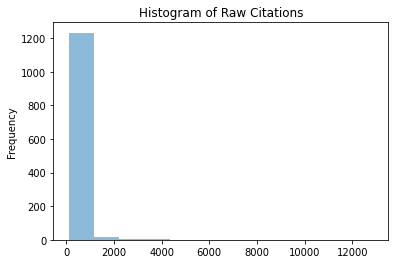

In [47]:
ax = df['n_citation'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram of Raw Citations')
# plt.xlim(0,2000)
plt.show()

## Checking QQPlot of SIS

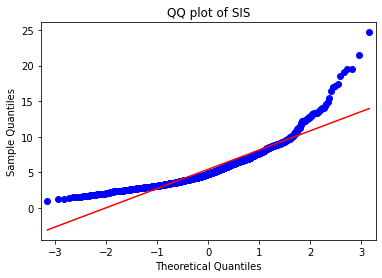

In [7]:
data = df['semantic score']
qqplot(data,line='s')
plt.title('QQ plot of SIS')
plt.show()

## Finding SIS distribution: Kolmagarov Smirnov Test

In [15]:
import scipy.stats as stats
stats.kstest(list(df['semantic score']), 'lognorm',lognorm.fit(df['semantic score']))

KstestResult(statistic=0.029247720544732125, pvalue=0.2279467136019126)

In [17]:
import scipy.stats as stats
stats.kstest(list(df['semantic score']), 'pareto',pareto.fit(df['semantic score']))

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


KstestResult(statistic=0.2471266829151315, pvalue=3.731089927371123e-68)

In [19]:
import scipy.stats as stats
stats.kstest(list(df['semantic score']), 'powerlaw',powerlaw.fit(df['semantic score']))

KstestResult(statistic=0.3664668558006694, pvalue=5.583174728096445e-152)

In [25]:
import scipy.stats as stats
stats.kstest(list(df['semantic score']), 'skewnorm',skewnorm.fit(df['semantic score']))

KstestResult(statistic=0.05496708583740634, pvalue=0.0009595079885971192)

In [28]:
import scipy.stats as stats
stats.kstest(list(df['semantic score']), 'norm',norm.fit(df['semantic score']))

KstestResult(statistic=0.10458114636322358, pvalue=1.961660984464879e-12)

In [26]:
import scipy.stats as stats
stats.kstest(list(df['semantic score']), 'norm',norm.fit(df['semantic score']))

KstestResult(statistic=0.10458114636322358, pvalue=1.961660984464879e-12)

In [9]:
data = df['semantic score']
stat,p = shapiro(data)
p

2.4674315263449397e-31